In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [57]:
import matplotlib.font_manager as fm

[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]
plt.rcParams['font.family'] = 'NanumGothic'

In [58]:
df = pd.read_csv('../bigdata/LPOINT_BIG_COMP/LPOINT_BIG_COMP_01_DEMO.csv')
df.head(5)
df.shape

(29913, 4)

In [53]:
df['zon_hlv'].unique()

array(['Z07', 'Z12', 'Z11', 'Z17', 'Z10', 'Z05', 'Z16', 'Z03', 'Z06',
       'Z14', 'Z01', 'Z04', 'Z09', 'Z15', 'Z08', 'Z13', 'Z02'],
      dtype=object)

In [54]:
df['zon_hlv'].nunique()

17

<AxesSubplot:xlabel='zon_hlv', ylabel='count'>

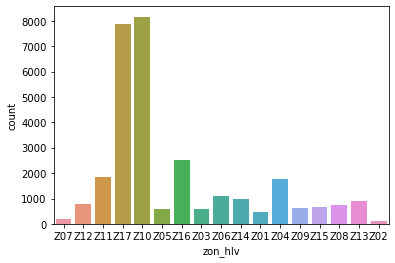

In [55]:
sns.countplot(x='zon_hlv', data=df)

### 연령별 구매 비율

<AxesSubplot:xlabel='ages', ylabel='count'>

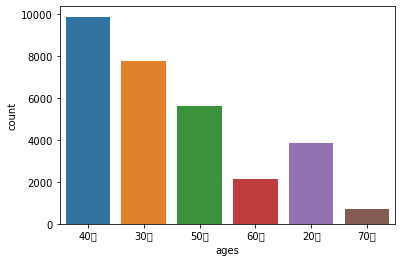

In [36]:
sns.countplot(x='ages', data=df)

### 성별 구매 비율

<AxesSubplot:xlabel='ma_fem_dv', ylabel='count'>

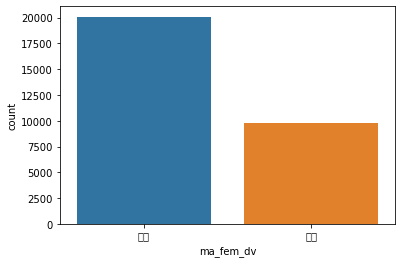

In [7]:
sns.countplot(x='ma_fem_dv', data=df)

In [8]:
df_2 = pd.read_csv('../bigdata/LPOINT_BIG_COMP/LPOINT_BIG_COMP_02_PDDE.csv')
df_2

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700.0,1
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1
3,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1
4,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000.0,1
...,...,...,...,...,...,...,...,...,...,...
4381738,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1
4381739,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1
4381740,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1
4381741,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1


### 오프/온라인 이용률

In [9]:
df_2['chnl_dv'].value_counts()

1    3953242
2     428501
Name: chnl_dv, dtype: int64

<AxesSubplot:xlabel='chnl_dv', ylabel='count'>

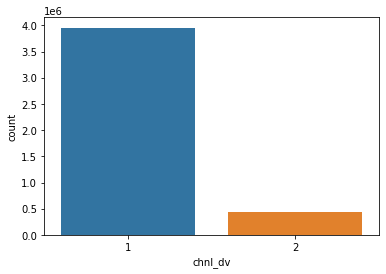

In [10]:
sns.countplot(x='chnl_dv', data=df_2)

### 주문 시간

<AxesSubplot:xlabel='de_hr', ylabel='count'>

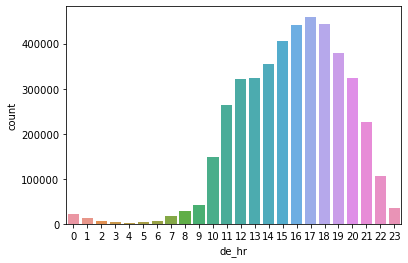

In [11]:
sns.countplot(x='de_hr', data=df_2)

### 1, 2 df merge

In [12]:
df_merge_outer = pd.merge(df,df_2, how='outer', on='cust')
df_merge_outer

,cust,ma_fem_dv,ages,zon_hlv,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct
0,M000034966,여성,40대,Z07,A01016688590,1.0,A01,A010045,PD0777,20210116.0,18.0,59000.0,1.0
1,M000034966,여성,40대,Z07,A01016688590,1.0,A01,A010045,PD0777,20210116.0,18.0,19000.0,1.0
2,M000034966,여성,40대,Z07,A01016688590,1.0,A01,A010045,PD0796,20210116.0,18.0,100.0,1.0
3,M000034966,여성,40대,Z07,A01016718167,1.0,A01,A010045,PD0816,20210116.0,18.0,62100.0,1.0
4,M000034966,여성,40대,Z07,A02357398521,1.0,A02,A020116,PD0630,20210325.0,13.0,19900.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4384734,M999962961,여성,50대,Z17,A05001012161,1.0,A05,A050039,PD0541,20210313.0,20.0,599000.0,1.0
4384735,M999962961,여성,50대,Z17,E06002810292,2.0,A06,NaN,PD0959,20210113.0,18.0,129000.0,1.0
4384736,M999962961,여성,50대,Z17,E06004609359,2.0,A06,NaN,PD0954,20210122.0,14.0,34300.0,1.0
4384737,M999962961,여성,50대,Z17,E06025413888,2.0,A06,NaN,PD0967,20210406.0,17.0,89000.0,1.0


In [13]:
ans = df_merge_outer.groupby(['ma_fem_dv', 'buy_ct'], as_index=False).size()
ans

,ma_fem_dv,buy_ct,size
0,남성,1.0,1071366
1,남성,2.0,132769
2,남성,3.0,31342
3,남성,4.0,13266
4,남성,5.0,6227
...,...,...,...
148,여성,89.0,1
149,여성,90.0,5
150,여성,96.0,2
151,여성,99.0,31


<AxesSubplot:xlabel='size', ylabel='buy_ct'>

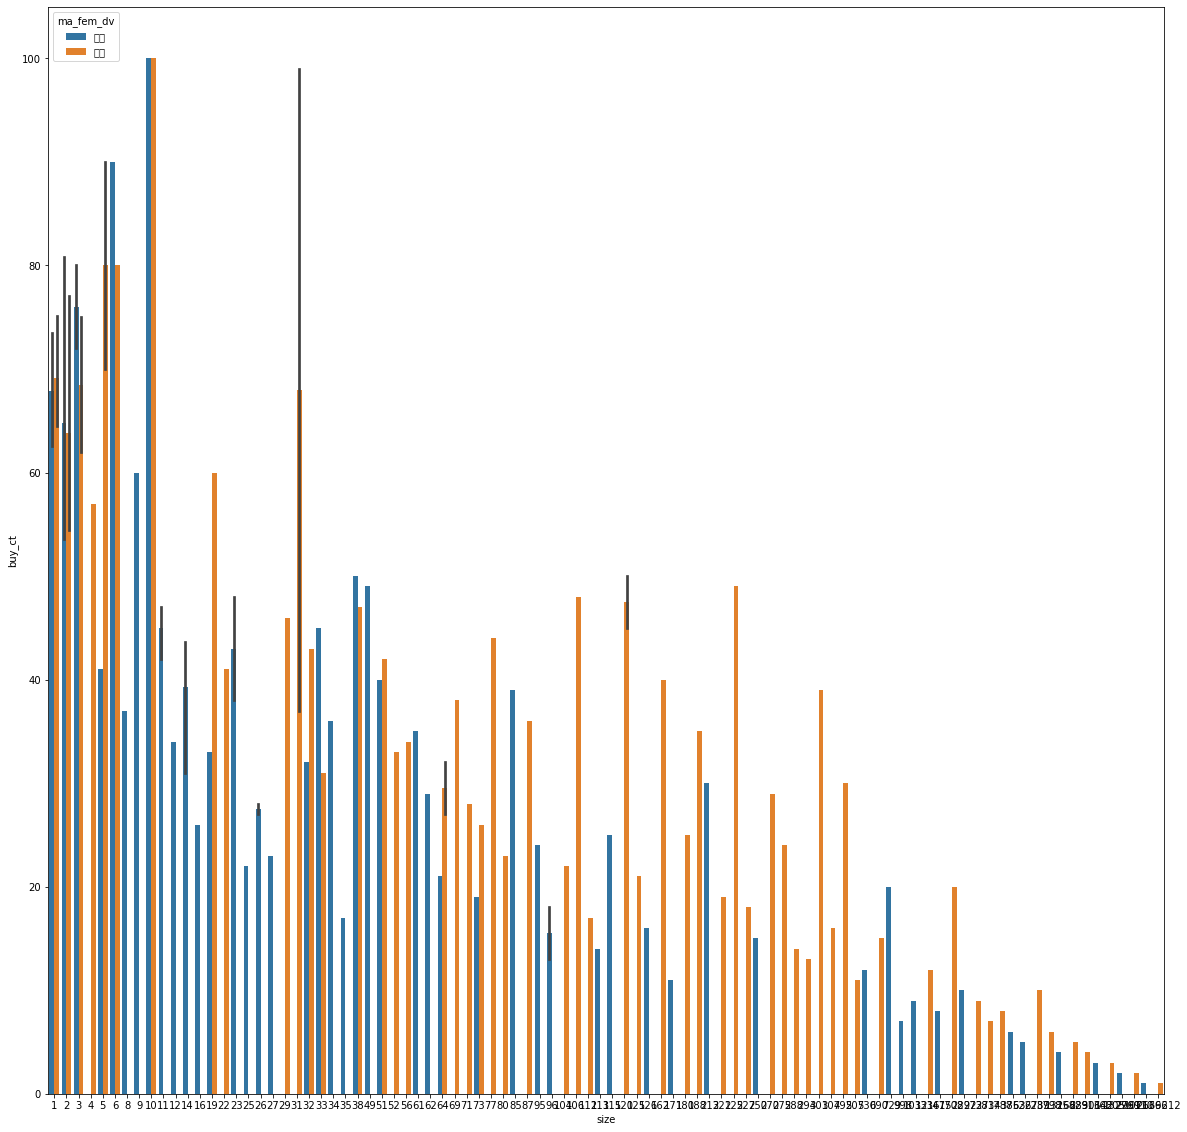

In [14]:
plt.figure(figsize=(20, 20))
sns.barplot(x="size", y="buy_ct", hue="ma_fem_dv", data=ans)

### 남성 / 여성 구매율 평균

In [15]:
ans = ans[['ma_fem_dv', 'size']].groupby('ma_fem_dv', as_index=False).mean()
ans

,ma_fem_dv,size
0,남성,16469.012987
1,여성,40968.802632


<AxesSubplot:xlabel='ma_fem_dv', ylabel='size'>

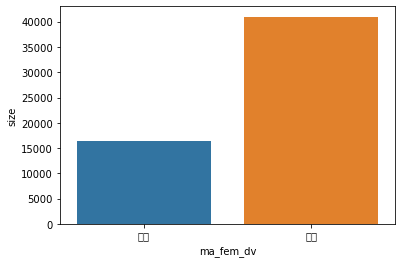

In [16]:
sns.barplot(x="ma_fem_dv", y="size", data=ans)

In [42]:
df_3 = pd.read_csv('../bigdata/LPOINT_BIG_COMP/LPOINT_BIG_COMP_04_PD_CLAC.csv')
df_3

,pd_c,pd_nm,clac_hlv_nm,clac_mcls_nm
0,PD0001,소파,가구,거실가구
1,PD0002,스툴/리빙의자,가구,거실가구
2,PD0003,탁자,가구,거실가구
3,PD0004,장식장/진열장,가구,거실가구
4,PD0005,기타가구,가구,기타가구
...,...,...,...,...
1928,PD1929,여성향수,화장품/뷰티케어,향수
1929,PD1930,남성향수,화장품/뷰티케어,향수
1930,PD1931,남녀공용향수,화장품/뷰티케어,향수
1931,PD1932,남성향수세트,화장품/뷰티케어,향수


In [49]:
df_3['clac_hlv_nm'].unique()

array(['가구', '건강식품', '건강용품', '건해산물', '계절가전', '공구/안전용품', '과일', '과자',
       '구기/필드스포츠', '금융/보험서비스', '기타(비상품)', '기타상품', '남성의류', '냉동식품',
       '냉장/세탁가전', '냉장식품', '담배', '대용식', '모바일', '문구/사무용품', '병통조림', '상품권',
       '생활/렌탈서비스', '생활/주방가전', '서적/음반/악기', '세제/위생', '속옷/양말/홈웨어', '수산물',
       '스포츠패션', '시즌스포츠', '식기/조리기구', '아웃도어/레저', '양곡', '여성의류', '여행/레저서비스',
       '영상/음향가전', '완구', '원예/애완', '유아동의류', '유아식품', '유제품', '음료', '인테리어/조명',
       '자동차용품', '조리식품', '조미료', '주류', '주방잡화', '채소', '청소/세탁/욕실용품', '축산물',
       '출산/육아용품', '침구/수예', '커피/차', '컴퓨터', '테넌트/음식점', '패션잡화', '퍼스널케어',
       '헬스/피트니스', '화장품/뷰티케어'], dtype=object)

In [19]:
df_merge_2 = pd.merge(df_merge_outer, df_3, how='outer', on='pd_c')
df_merge_2

,cust,ma_fem_dv,ages,zon_hlv,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,pd_nm,clac_hlv_nm,clac_mcls_nm
0,M000034966,여성,40대,Z07,A01016688590,1.0,A01,A010045,PD0777,20210116.0,18.0,59000.0,1.0,남성런닝/트레이닝화,스포츠패션,남성스포츠화
1,M000034966,여성,40대,Z07,A01016688590,1.0,A01,A010045,PD0777,20210116.0,18.0,19000.0,1.0,남성런닝/트레이닝화,스포츠패션,남성스포츠화
2,M000136117,여성,30대,Z11,A01294575336,1.0,A01,A010018,PD0777,20210805.0,15.0,239000.0,1.0,남성런닝/트레이닝화,스포츠패션,남성스포츠화
3,M000261625,여성,40대,Z17,A01117216600,1.0,A01,A010017,PD0777,20210403.0,13.0,179000.0,1.0,남성런닝/트레이닝화,스포츠패션,남성스포츠화
4,M000419293,여성,40대,Z17,A02041463489,1.0,A02,A020008,PD0777,20210129.0,14.0,3000.0,3.0,남성런닝/트레이닝화,스포츠패션,남성스포츠화
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4384734,M858719851,여성,60대,Z16,A05001516873,1.0,A05,A050072,PD0995,20210430.0,10.0,139000.0,1.0,보이스레코더,영상/음향가전,소형디지털가전
4384735,M880029153,남성,40대,Z16,E06043468594,2.0,A06,NaN,PD0917,20210712.0,21.0,199000.0,1.0,미니벨로,아웃도어/레저,자전거
4384736,M986268092,남성,40대,Z09,E06040602652,2.0,A06,NaN,PD0917,20210523.0,8.0,187050.0,1.0,미니벨로,아웃도어/레저,자전거
4384737,M926014276,남성,40대,Z10,A02105319111,1.0,A02,A020023,PD1059,20210828.0,17.0,800000.0,8.0,분양,원예/애완,동물병원


### 여성 구매 품목

In [20]:
ans = df_merge_2[['ma_fem_dv', 'clac_hlv_nm']]
ans

,ma_fem_dv,clac_hlv_nm
0,여성,스포츠패션
1,여성,스포츠패션
2,여성,스포츠패션
3,여성,스포츠패션
4,여성,스포츠패션
...,...,...
4384734,여성,영상/음향가전
4384735,남성,아웃도어/레저
4384736,남성,아웃도어/레저
4384737,남성,원예/애완


In [21]:
ans_female = ans[ans['ma_fem_dv'] == '여성']
res = ans_female[['ma_fem_dv', 'clac_hlv_nm']].groupby(['ma_fem_dv', 'clac_hlv_nm']).size().unstack()
res.max().sort_values(ascending=False)

clac_hlv_nm
채소            317729
과자            310548
대용식           218272
유제품           202722
냉장식품          188646
과일            167968
음료            157388
축산물           140268
테넌트/음식점       122522
주류            107915
조미료           101941
냉동식품           87601
청소/세탁/욕실용품     74666
조리식품           70377
여성의류           61538
수산물            58484
문구/사무용품        56733
남성의류           49288
주방잡화           45250
스포츠패션          45228
세제/위생          44039
패션잡화           42175
퍼스널케어          40793
건해산물           38863
화장품/뷰티케어       35449
속옷/양말/홈웨어      30314
기타(비상품)        30285
커피/차           25826
완구             24525
병통조림           22428
유아동의류          20741
식기/조리기구        18129
양곡             16435
원예/애완          16270
담배             14588
건강식품           10776
유아식품           10679
공구/안전용품         8028
침구/수예           7614
아웃도어/레저         7415
출산/육아용품         7358
건강용품            7091
자동차용품           6302
상품권             6267
생활/렌탈서비스        4864
구기/필드스포츠        3950
헬스/피트니스         3855
생

### 남성 구매 품목

In [22]:
ans_female = ans[ans['ma_fem_dv'] == '남성']
res = ans_female[['ma_fem_dv', 'clac_hlv_nm']].groupby(['ma_fem_dv', 'clac_hlv_nm']).size().unstack()
res.max().sort_values(ascending=False)

clac_hlv_nm
과자            129675
채소            105449
대용식            93694
음료             92791
유제품            81698
냉장식품           77835
과일             63122
주류             61919
축산물            49794
테넌트/음식점        43718
냉동식품           38963
조미료            36075
조리식품           33853
청소/세탁/욕실용품     29527
담배             26051
수산물            21724
문구/사무용품        20182
남성의류           19288
세제/위생          16966
주방잡화           16065
스포츠패션          16022
기타(비상품)        15517
퍼스널케어          14211
패션잡화           13863
건해산물           13292
여성의류           13031
완구             11061
병통조림            9033
커피/차            8884
화장품/뷰티케어        8717
속옷/양말/홈웨어       8468
유아동의류           6548
상품권             6479
생활/렌탈서비스        5723
양곡              5691
식기/조리기구         5586
원예/애완           5162
건강식품            4230
유아식품            4111
공구/안전용품         4095
건강용품            3638
자동차용품           3361
아웃도어/레저         2981
출산/육아용품         2830
침구/수예           2196
컴퓨터             1937
생활/주방가전         1753
구

### 엘페이

In [30]:
df_4 = pd.read_csv('../bigdata/LPOINT_BIG_COMP/LPOINT_BIG_COMP_06_LPAY.csv')
df_4

,cust,rct_no,cop_c,chnl_dv,de_dt,de_hr,buy_am
0,M629656521,210803210311226,A03,1,20210803,21,10900
1,M216016456,210803130167542,L01,2,20210803,13,6860
2,M205142844,210803140275112,A02,1,20210803,14,9000
3,M737010483,210803040637594,A06,2,20210803,4,36740
4,M707775545,210803140675502,A06,2,20210803,14,138500
...,...,...,...,...,...,...,...
353179,M470112503,210125110644545,A06,2,20210125,11,51800
353180,M470112503,210104210652271,A06,2,20210104,21,6440
353181,M748878049,210119200278240,A02,1,20210119,20,17600
353182,M748878049,210119180267206,A02,1,20210119,18,12400


In [32]:
df_merge_lpay = pd.merge(df_4, df, how='outer', on='cust')
df_merge_lpay

,cust,rct_no,cop_c,chnl_dv,de_dt,de_hr,buy_am,ma_fem_dv,ages,zon_hlv
0,M629656521,2.108032e+14,A03,1.0,20210803.0,21.0,10900.0,남성,40대,Z04
1,M216016456,2.108031e+14,L01,2.0,20210803.0,13.0,6860.0,여성,40대,Z04
2,M216016456,2.112231e+14,L01,2.0,20211223.0,11.0,12650.0,여성,40대,Z04
3,M216016456,2.112231e+14,L01,2.0,20211223.0,12.0,310.0,여성,40대,Z04
4,M216016456,2.104010e+14,L01,2.0,20210401.0,1.0,1500.0,여성,40대,Z04
...,...,...,...,...,...,...,...,...,...,...
374186,M999515910,NaN,NaN,NaN,NaN,NaN,NaN,남성,40대,Z05
374187,M999673157,NaN,NaN,NaN,NaN,NaN,NaN,남성,30대,Z10
374188,M999708287,NaN,NaN,NaN,NaN,NaN,NaN,여성,40대,Z10
374189,M999849895,NaN,NaN,NaN,NaN,NaN,NaN,여성,20대,Z04


In [59]:
df_merge_lpay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374191 entries, 0 to 374190
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   cust       374191 non-null  object 
 1   rct_no     353184 non-null  float64
 2   cop_c      353184 non-null  object 
 3   chnl_dv    353184 non-null  float64
 4   de_dt      353184 non-null  float64
 5   de_hr      353184 non-null  float64
 6   buy_am     353184 non-null  float64
 7   ma_fem_dv  374191 non-null  object 
 8   ages       374191 non-null  object 
 9   zon_hlv    374191 non-null  object 
dtypes: float64(5), object(5)
memory usage: 31.4+ MB


In [41]:
df_5 = pd.read_csv('../bigdata/뉴스빅데이터.csv', encoding='cp949')
keyword_df = df_5[['일자', '특성추출']]
keyword_df

,일자,특성추출
0,2020-01-01,"소비자,친환경,온라인,아이스팩,소비자들,생협,esg,재활용,최우식,포장상자,물류센터..."
1,2020-01-01,"iss,한국,shareholder,timing,투자자,지배구조,워렌,주주총회,esg..."
2,2020-01-01,"투자자,toniic,한국,벤델,비욘드미트,대기업,화장실,esg,뉴욕,대체육류"
3,2020-01-01,"바스프,유니레버,esg,sustainable,기업들,베트남,동남아시아,배출량,폐플라..."
4,2020-01-01,"esg,중소기업,금융사,비재무,kb,신용평가,scb,크레비스,관계자,현대커머셜,윤종..."
...,...,...
4797,2020-12-31,"중요성,소비자,친환경,김광수,우보만리,연합회장,불평등,소비자보호,그간,배출량,공식화..."
4798,2020-12-31,"코로나,경쟁력,성윤모,미래차,제조업,신년사,태양광,실물경제,전기차,반도체,공급망,미..."
4799,2020-12-31,"농협은행,농협,본부장,농협금융,권준학,빅데이터,후보자,임추위,농협은행장,은행장,농협..."
4800,2020-12-31,"이사장,스타트업,머니볼,유니콘,윤대희,빌리,로드맵,지배구조,esg,애슬레틱스,신년사..."
